In [54]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint

In [76]:
class tuningAIMD:
    def __init__(self, initial_cwnd=None, num_users=2, capacity=10):
        # Create a list of lists to store cwnd values for each flow
        # User may provide a list (with length: num_users) containing initial cwnd values, otherwise random values for initial cwnd are generated
        
        # Assign initial cwnd values provided by the user
        if initial_cwnd and len(initial_cwnd)==num_users:
            self.cwnd = [[initial_cwnd[i]] for i in range(num_users)]
        # Exit if initial cwnd list length does not correspond with the number of users
        elif initial_cwnd and len(initial_cwnd)!=num_users:
            print('Size of initial cwnd list provided does not correspond with number of users!')
            return -1
        # Generate random values for each user's initial cwnd
        else:
            seed(1)
            self.cwnd = [[randint(1, capacity)] for i in range(num_users)]

        print(f'Initial flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        self.num_users = num_users
        self.capacity = capacity

    def plot_simulation(self):
        # only when num_users=2, we plot each user's allocation on each axis (x-axis, y-axies)
        if (self.num_users == 2):
            plt.figure(figsize = (8, 8))

            plt.plot(self.cwnd[0], self.cwnd[1], '-o', label='AIMD Iterates')
            plt.xlabel('User 1\'s Allocation, X1')
            plt.ylabel('User 2\'s Allocation, X2')
            plt.title('AIMD Algorithm Simulation')

            plt.plot([0,self.capacity], [0,self.capacity], '--', label='Fairness Line')
            plt.plot([0,self.capacity], [self.capacity,0],'-', label='Efficiency Line')

            plt.grid()
            plt.legend()
            plt.show()
        
        # Plotting of flows' cwnd against RTT
        plt.figure(figsize = (8, 8))        
        for flow in range(self.num_users):
            plt.plot(self.cwnd[flow], '-o', label=f'Flow {flow+1}')
        plt.xlabel('RTT')
        plt.ylabel('cwnd')

        plt.grid()
        plt.legend()
        plt.show()

    def run_simulation(self, alpha=1, beta=0.5, max_iteration=100):
        # Run for max_iterations
        for i in range(max_iteration):
            # Check if user's total allocation is within capacity
            if sum(self.cwnd[flow][-1] for flow in range(self.num_users)) <= self.capacity:
                # Proceed with Additive Increase
                for flow in self.cwnd:
                    new_flow_value = flow[-1] + alpha
                    flow.append(new_flow_value)
                print(f'Interation {i}: Additive Increase. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
            
            # Otherwise, if user's total allocations exceeds capacity of the link
            else:
                # Proceed with Multiplicative Decrease
                for flow in self.cwnd:
                    new_flow_value = flow[-1] * beta
                    flow.append(new_flow_value)
                print(f'Interation {i}: Multiplicative Decrease. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        # Displaying the final values 
        print('==== Final Values ====')
        for flow in range(len(self.cwnd)):
            print(f'User {flow+1}: {self.cwnd[flow][-1]}')

        # Plot
        self.plot_simulation()

    

Experiments

Initial flow allocations: [3, 10]
Interation 0: Multiplicative Decrease. New flow allocations: [1.5, 5.0]
Interation 1: Additive Increase. New flow allocations: [2.5, 6.0]
Interation 2: Additive Increase. New flow allocations: [3.5, 7.0]
Interation 3: Multiplicative Decrease. New flow allocations: [1.75, 3.5]
Interation 4: Additive Increase. New flow allocations: [2.75, 4.5]
Interation 5: Additive Increase. New flow allocations: [3.75, 5.5]
Interation 6: Additive Increase. New flow allocations: [4.75, 6.5]
Interation 7: Multiplicative Decrease. New flow allocations: [2.375, 3.25]
Interation 8: Additive Increase. New flow allocations: [3.375, 4.25]
Interation 9: Additive Increase. New flow allocations: [4.375, 5.25]
Interation 10: Additive Increase. New flow allocations: [5.375, 6.25]
Interation 11: Multiplicative Decrease. New flow allocations: [2.6875, 3.125]
Interation 12: Additive Increase. New flow allocations: [3.6875, 4.125]
Interation 13: Additive Increase. New flow allocations:

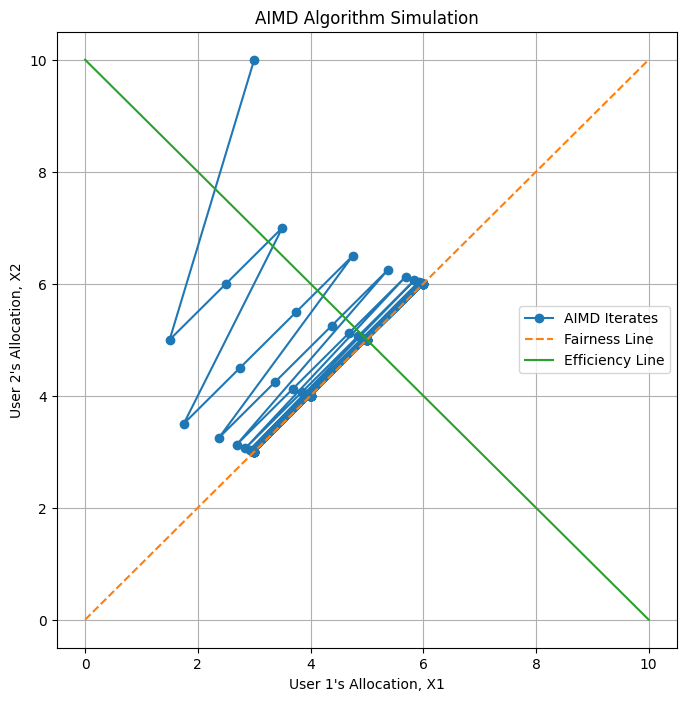

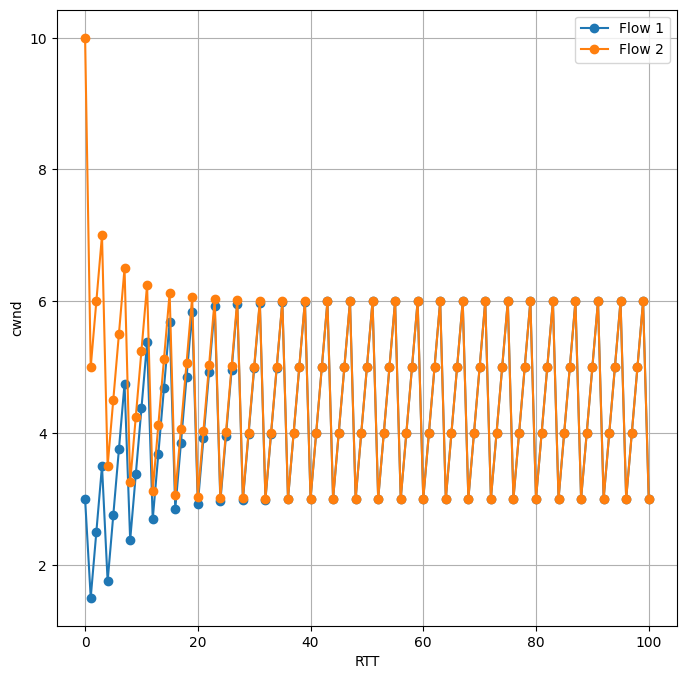

In [77]:
e1 = tuningAIMD()
e1.run_simulation()

Rough Work

In [10]:
cwnd = [[4,3],[3,2],[10,3]]
num_users = 3

print(sum(cwnd[flow][-1] for flow in range(num_users)))

print(sum(cwnd[flow][-1] for flow in range(num_users)) <= 10)

8
True


In [16]:
print([flow[-1] for flow in cwnd])

[3, 2, 3]


In [17]:
alpha = 1
for flow in cwnd:
    new_flow_value = flow[-1] + alpha
    flow.append(new_flow_value)
print([flow[-1] for flow in cwnd])

[4, 3, 4]


In [25]:
print('==== Final Values ====')
i = 1
for flow in cwnd:

    print(f'User {i}: {flow[-1]}')
    i+= 1

==== Final Values ====
User 1: 4
User 2: 3
User 3: 4


In [36]:
print('==== Final Values ====')
for flow in range(len(cwnd)):
    print(f'User {flow+1}: {cwnd[flow][-1]}')

==== Final Values ====
User 1: 4
User 2: 3
User 3: 4


0
1


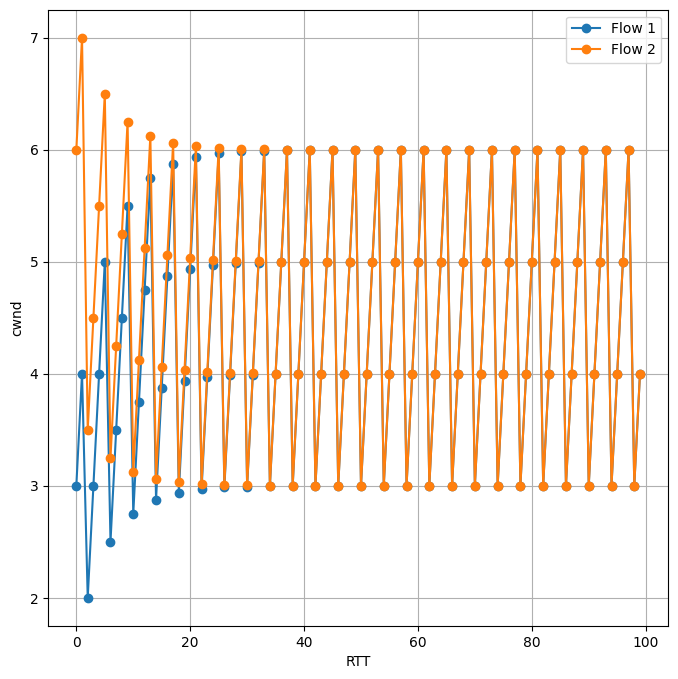

In [41]:
capacity =10
cwnd = [[3.        , 4.        , 2.        , 3.        , 4.        ,
       5.        , 2.5       , 3.5       , 4.5       , 5.5       ,
       2.75      , 3.75      , 4.75      , 5.75      , 2.875     ,
       3.875     , 4.875     , 5.875     , 2.9375    , 3.9375    ,
       4.9375    , 5.9375    , 2.96875   , 3.96875   , 4.96875   ,
       5.96875   , 2.984375  , 3.984375  , 4.984375  , 5.984375  ,
       2.9921875 , 3.9921875 , 4.9921875 , 5.9921875 , 2.99609375,
       3.99609375, 4.99609375, 5.99609375, 2.99804688, 3.99804688,
       4.99804688, 5.99804688, 2.99902344, 3.99902344, 4.99902344,
       5.99902344, 2.99951172, 3.99951172, 4.99951172, 5.99951172,
       2.99975586, 3.99975586, 4.99975586, 5.99975586, 2.99987793,
       3.99987793, 4.99987793, 5.99987793, 2.99993896, 3.99993896,
       4.99993896, 5.99993896, 2.99996948, 3.99996948, 4.99996948,
       5.99996948, 2.99998474, 3.99998474, 4.99998474, 5.99998474,
       2.99999237, 3.99999237, 4.99999237, 5.99999237, 2.99999619,
       3.99999619, 4.99999619, 5.99999619, 2.99999809, 3.99999809,
       4.99999809, 5.99999809, 2.99999905, 3.99999905, 4.99999905,
       5.99999905, 2.99999952, 3.99999952, 4.99999952, 5.99999952,
       2.99999976, 3.99999976, 4.99999976, 5.99999976, 2.99999988,
       3.99999988, 4.99999988, 5.99999988, 2.99999994, 3.99999994], [6.        , 7.        , 3.5       , 4.5       , 5.5       ,
       6.5       , 3.25      , 4.25      , 5.25      , 6.25      ,
       3.125     , 4.125     , 5.125     , 6.125     , 3.0625    ,
       4.0625    , 5.0625    , 6.0625    , 3.03125   , 4.03125   ,
       5.03125   , 6.03125   , 3.015625  , 4.015625  , 5.015625  ,
       6.015625  , 3.0078125 , 4.0078125 , 5.0078125 , 6.0078125 ,
       3.00390625, 4.00390625, 5.00390625, 6.00390625, 3.00195312,
       4.00195312, 5.00195312, 6.00195312, 3.00097656, 4.00097656,
       5.00097656, 6.00097656, 3.00048828, 4.00048828, 5.00048828,
       6.00048828, 3.00024414, 4.00024414, 5.00024414, 6.00024414,
       3.00012207, 4.00012207, 5.00012207, 6.00012207, 3.00006104,
       4.00006104, 5.00006104, 6.00006104, 3.00003052, 4.00003052,
       5.00003052, 6.00003052, 3.00001526, 4.00001526, 5.00001526,
       6.00001526, 3.00000763, 4.00000763, 5.00000763, 6.00000763,
       3.00000381, 4.00000381, 5.00000381, 6.00000381, 3.00000191,
       4.00000191, 5.00000191, 6.00000191, 3.00000095, 4.00000095,
       5.00000095, 6.00000095, 3.00000048, 4.00000048, 5.00000048,
       6.00000048, 3.00000024, 4.00000024, 5.00000024, 6.00000024,
       3.00000012, 4.00000012, 5.00000012, 6.00000012, 3.00000006,
       4.00000006, 5.00000006, 6.00000006, 3.00000003, 4.00000003]]

plt.figure(figsize = (8, 8))        
for flow in range(2):
    print(flow)
    plt.plot(cwnd[flow], '-o', label=f'Flow {flow+1}')
plt.xlabel('RTT')
plt.ylabel('cwnd')

plt.grid()
plt.legend()
plt.show()

In [62]:
initial = [2,3,3]
num_users = 3
if initial and len(initial)==num_users:
    cwnd = [[initial[i]] for i in range(num_users)]
    print(cwnd)

[[2], [3], [3]]


In [68]:
seed(1)
cwnd = [[randint(1,10)] for i in range(num_users)]
print(cwnd)

[[3], [10], [2]]


In [71]:
cwnd = [[randint(1,10)] for i in range(num_users)]
cwnd

[[4], [2], [8]]